In [1]:
import numpy as np
import pandas as pd
from plotnine import *
from datetime import datetime

In [2]:
spioon_df = pd.read_csv('andmed/spioonid.csv')

spioon_df['kuupäev'] = spioon_df['kuupäev'].apply(lambda x: datetime.fromisoformat(x))
spioon_df['söögigraafik_nädal'] = spioon_df['kuupäev'].apply(lambda x: datetime.isocalendar(x).week % 6)
spioon_df['päev'] = spioon_df['kuupäev'].apply(lambda x: x.timetuple().tm_yday - 197)
spioon_df['päev_n'] = spioon_df.groupby('päev').cumcount()
spioon_df['sekund'] = spioon_df['kuupäev'].apply(lambda x: (x - x.replace(hour=0, minute=0)).total_seconds())
spioon_df['reservajal'] = spioon_df['sekund'] > 60300

spioon_df = spioon_df.sort_values('sekund')
spioon_df['n'] = np.arange(0, spioon_df.shape[0])

spioon_df.head()

,kuupäev,söögigraafik_nädal,päev,päev_n,sekund,reservajal,n
50,2023-08-10 06:41:22,2,25,0,24060.0,False,0
41,2023-08-08 07:19:48,2,23,0,26340.0,False,1
16,2023-07-29 13:18:00,0,13,0,47880.0,False,2
17,2023-07-29 13:44:00,0,13,1,49440.0,False,3
0,2023-07-23 14:11:00,5,7,0,51060.0,False,4


In [3]:
toit_df = pd.read_csv('andmed/söögiajad_õr5.csv', index_col='nädal')

for veerg in toit_df:
    toit_df[veerg] = toit_df[veerg].apply(lambda x: datetime.fromisoformat(x))
    toit_df[veerg] = toit_df[veerg].apply(lambda x: (x - datetime.fromtimestamp(0).replace(hour=0)).total_seconds())

## Päevade loendavad punktiprotsessid

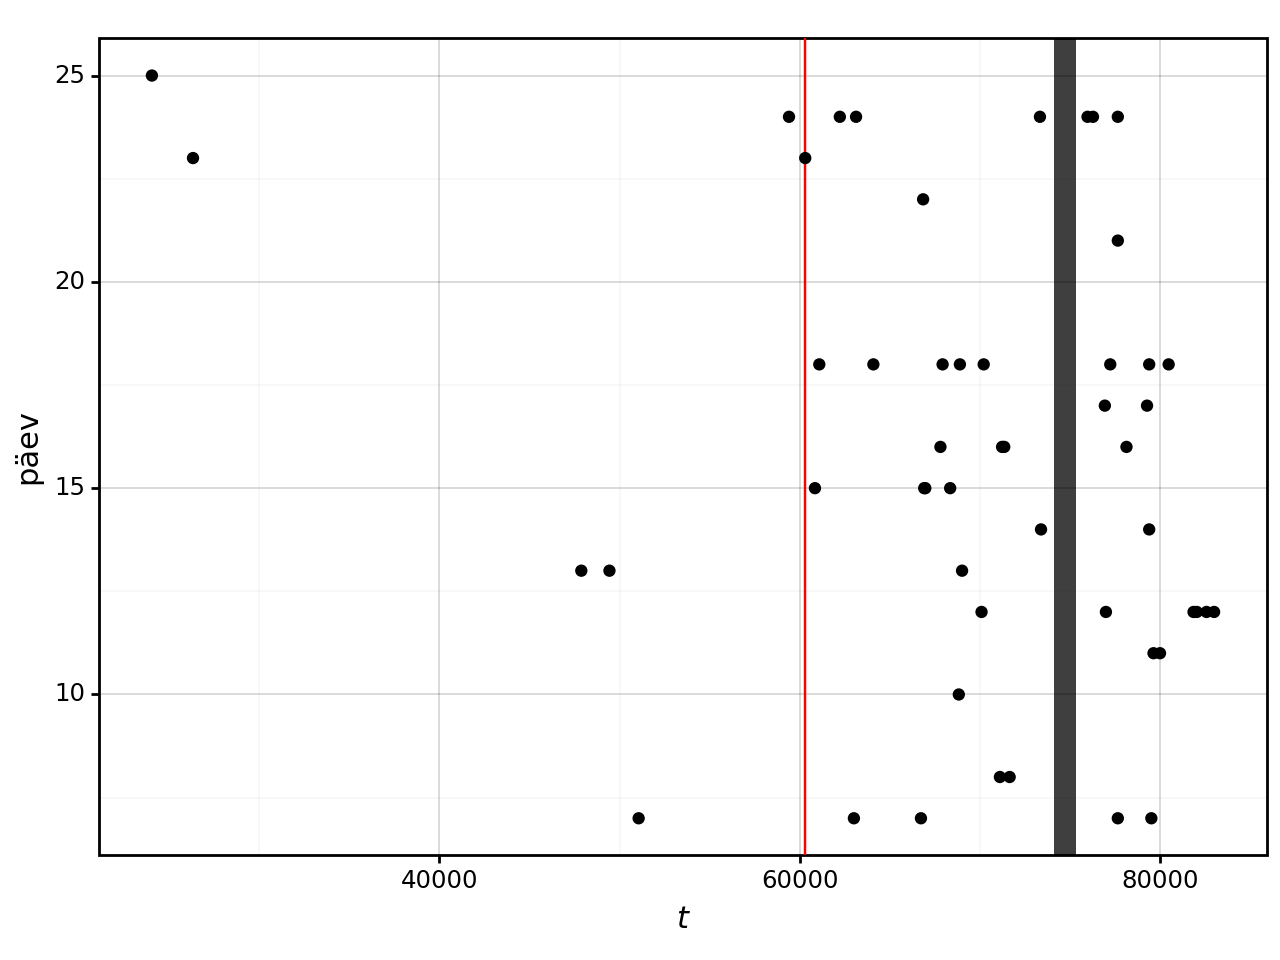

<Figure Size: (640 x 480)>

In [4]:
g = ggplot(spioon_df) + theme_linedraw() + aes('sekund', 'päev')
g += labs(x='$t$', y='päev')
g += geom_vline(xintercept=60300, color='r')  # reservaja algus
g += geom_rect(xmin=74100, xmax=75300, ymin=-float('inf'), ymax=float('inf'), fill='k', alpha=0.025)  # õhtune rivistus
g += geom_point()

# g.save('paber/spioonid_päevad.png', dpi=100)
g

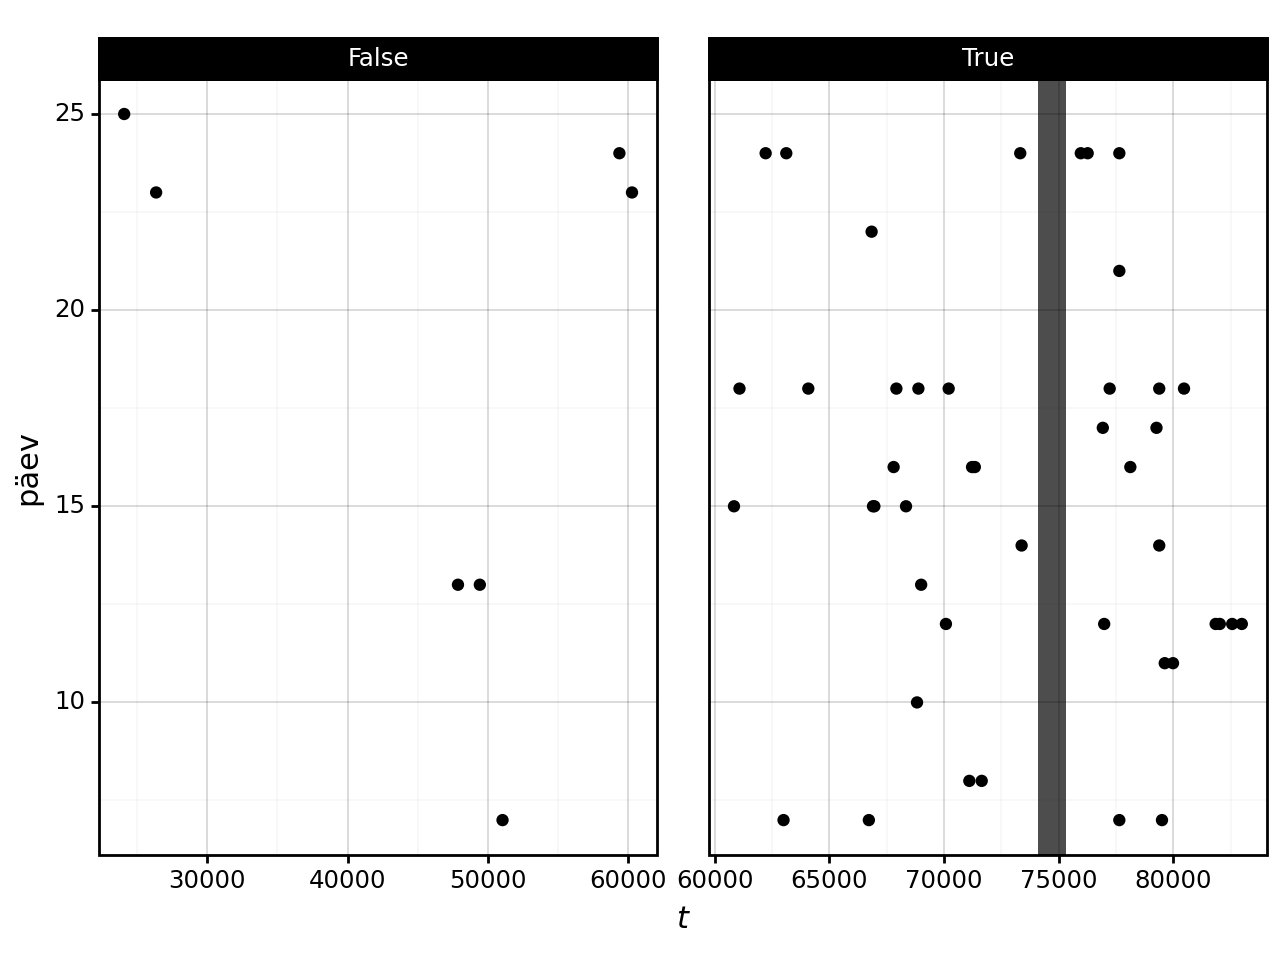

<Figure Size: (640 x 480)>

In [5]:
g = ggplot(spioon_df) + facet_wrap('reservajal', scales='free_x') + aes('sekund', 'päev')
g += theme_linedraw() + theme(panel_spacing=0.04)
g += labs(x='$t$', y='päev')
g += geom_rect(xmin=74100, xmax=75300, ymin=-float('inf'), ymax=float('inf'), fill='k', alpha=0.025)  # õhtune rivistus
g += geom_point()

# g.save('paber/spioonid_päevad_reservaeg.png', dpi=100)
g

## Astmejoonis

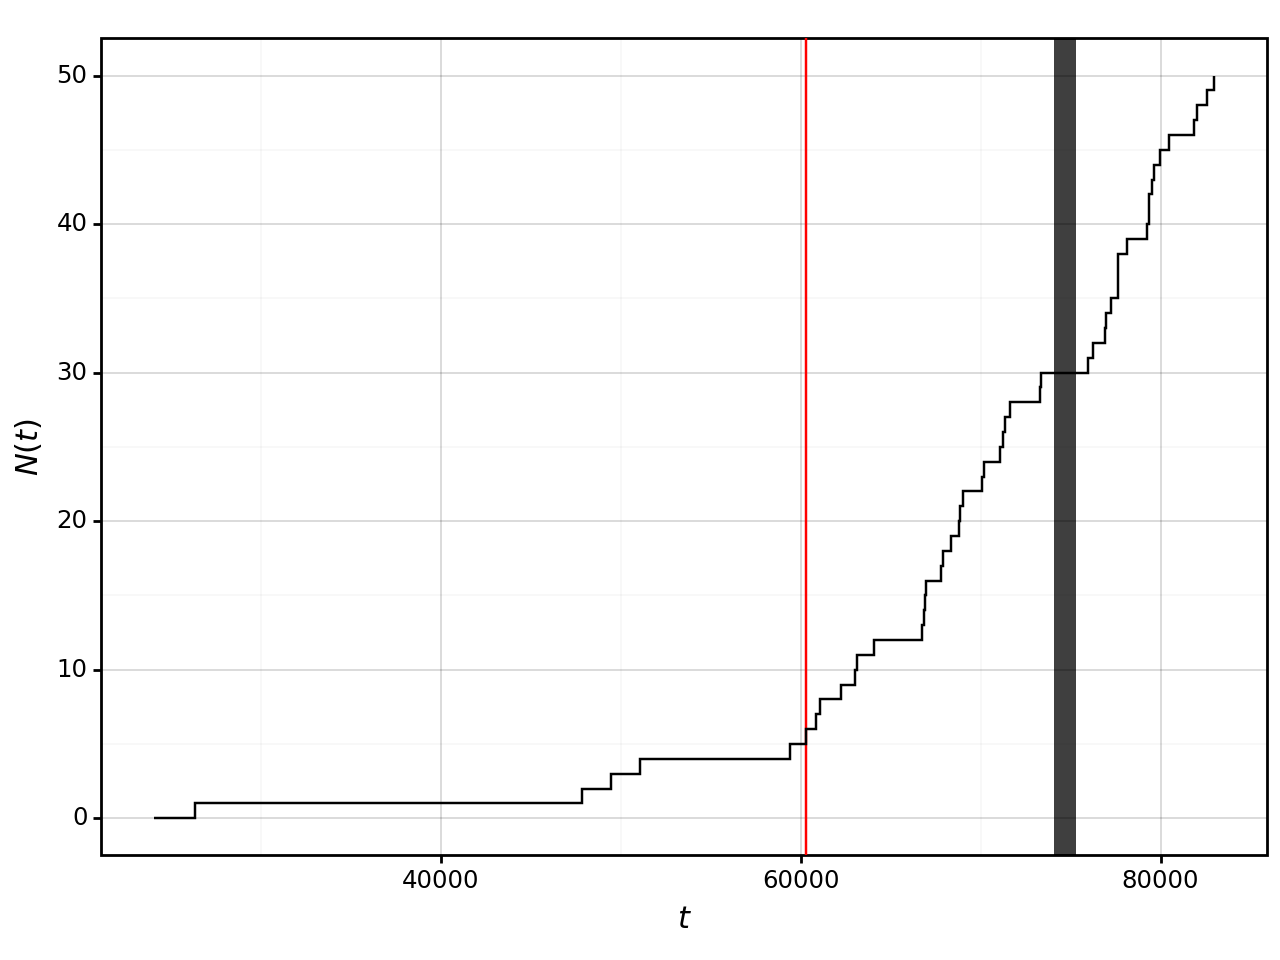

<Figure Size: (640 x 480)>

In [6]:
g = ggplot(spioon_df) + theme_linedraw() + aes('sekund', 'n')
g += labs(x='$t$', y='$N(t)$')
g += geom_vline(xintercept=60300, color='r')  # reservaja algus
g += geom_rect(xmin=74100, xmax=75300, ymin=-float('inf'), ymax=float('inf'), fill='k', alpha=0.025)  # õhtune rivistus
g += geom_step()

# g.save('paber/spioonid_astmejoonis.png', dpi=100)
g